In [1]:

!pip install pandas scikit-learn matplotlib seaborn

In [2]:
## Predicting House Prices ##

# Import libraries as per requirment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data= pd.read_csv("house_price_regression_dataset.csv")
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
data_table=data[['Square_Footage','Num_Bedrooms','House_Price']]
print(data_table.head())

   Square_Footage  Num_Bedrooms   House_Price
0            1360             2  2.623829e+05
1            4272             3  9.852609e+05
2            3592             1  7.779774e+05
3             966             1  2.296989e+05
4            4926             2  1.041741e+06


In [5]:
X=data_table.iloc[:,[0,1]].values  # Features
y=data_table.iloc[:,2].values  # Target
# Split into Training data and Testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [6]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print("Coefficient:",model.coef_)
print("Interpret:",model.intercept_)

Coefficient: [ 200.70085034 9722.04621112]
Interpret: 25236.973930693697


In [8]:
# Make Predictions
y_pred= model.predict(X_test)

In [9]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("R square Score :",r2_score(y_test,y_pred))


Mean Squared Error : 922909383.0335547
R square Score : 0.9847906269466


In [10]:
result= pd.DataFrame({'True Values':y_test, 'Predicted Response':y_pred})
print(result)

      True Values  Predicted Response
0    7.865846e+05        7.564308e+05
1    7.926815e+05        8.035310e+05
2    8.956756e+05        9.268497e+05
3    2.392346e+05        2.156543e+05
4    5.109681e+05        5.045512e+05
..            ...                 ...
195  5.454827e+05        5.614858e+05
196  9.240129e+05        1.003140e+06
197  6.241122e+05        6.679456e+05
198  6.214605e+05        6.155627e+05
199  1.006940e+06        9.770249e+05

[200 rows x 2 columns]


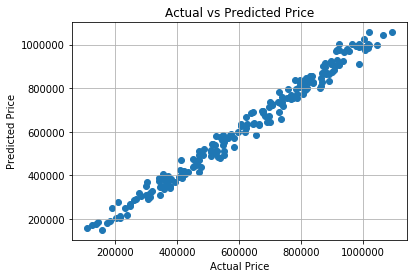

In [11]:
# Plotting
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

In [12]:
# Predict a New House Price
new_house=pd.DataFrame({'Num_Bedrooms':[3],'Square_Footage':[1500]})
predicted_price=model.predict(new_house)
print("Predicted Price for new house :",predicted_price[0])

Predicted Price for new house : 14608908.393168777
